<a href="https://colab.research.google.com/github/Lochipi/Titanic_EDA/blob/main/EDA_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#EDA in Titanic Dataset

#Exploratory Data Analysis
Refers to the process of performing initial investingations on data using summary statistics and graphical representations `to measure the data quality`, `to discover patterns` and `to spot anomalies`.

#Note EDA Thought Steps
- Categorical - mode and countplot
- Numeric - mean, median and histogram 
#EDA when analyzing two or more variables
- Numeric/Numeric - correlation, scatter
- Categorical/categoriacal - pivot 
- Categorical/Numeric - violin plot

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
os.environ['KAGGLE_USERNAME'] = 'corneliuslochipi'
os.environ['KAGGLE_KEY'] = '356b974aa921da8f6d145546ef93cc60'  

In [27]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 94.4MB/s]


In [16]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Unzipping the folder

In [28]:
# zipped = 'spaceship-titanic.zip'

import zipfile
with zipfile.ZipFile("spaceship-titanic.zip", 'r') as zip_ref:
    zip_ref.extractall('.')
    

Removing zipped folder

In [26]:
!rm * .zip

rm: cannot remove 'sample_data': Is a directory
rm: cannot remove '.zip': No such file or directory


Libraries


In [30]:
import pandas as pd
import numpy as np

Reading dataset, the `sample one`

In [31]:
df = pd.read_csv('sample_submission.csv')
df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [32]:
df.columns

Index(['PassengerId', 'Transported'], dtype='object')

In [51]:
data = pd.read_csv('/content/test.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Checking columns

In [52]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

`info` function provides a quick way to understand the structure of a DataFrame and the type of data it contains

In [53]:
data.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  

In [54]:
# shape (columns, rows)
data.shape

(4277, 13)

Checking duplicate values

In [55]:
data.duplicated().value_counts()

False    4277
dtype: int64

Null Values

In [56]:
data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Unique Values


In [45]:
data.PassengerId.unique()

array(['0013_01', '0018_01', '0019_01', ..., '9271_01', '9273_01',
       '9277_01'], dtype=object)

In [46]:
data.PassengerId.nunique()

4277

Passenger Unique values, count

In [63]:
data.PassengerId.nunique()

4277

#Analyzing Home Planet
- categorical variables
-checking null values 

In [65]:
data.HomePlanet.isnull().sum()

87

Taking a look at null values, they're seen as `NaN`

In [72]:
data[data.HomePlanet.isnull()].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
276,0616_01,NaN,False,E/40/S,TRAPPIST-1e,31.0,False,0.0,428.0,NaN,1154.0,1025.0,Arkaban Spriney
340,0730_01,NaN,False,F/135/S,TRAPPIST-1e,44.0,False,14.0,0.0,1817.0,2.0,171.0,Skunch Ponie
450,0936_01,NaN,False,F/171/S,TRAPPIST-1e,20.0,False,0.0,4.0,0.0,732.0,1.0,Anniey Currisones
464,0967_01,NaN,False,F/180/S,TRAPPIST-1e,19.0,False,1.0,0.0,0.0,0.0,632.0,Andan Fryan
481,1021_01,NaN,False,F/192/S,TRAPPIST-1e,23.0,False,0.0,458.0,151.0,256.0,0.0,Mara Ments


Returning values that are not null use `~`

In [74]:
data[~data.HomePlanet.isnull()].head(n=3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


Importing visualization libraries

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

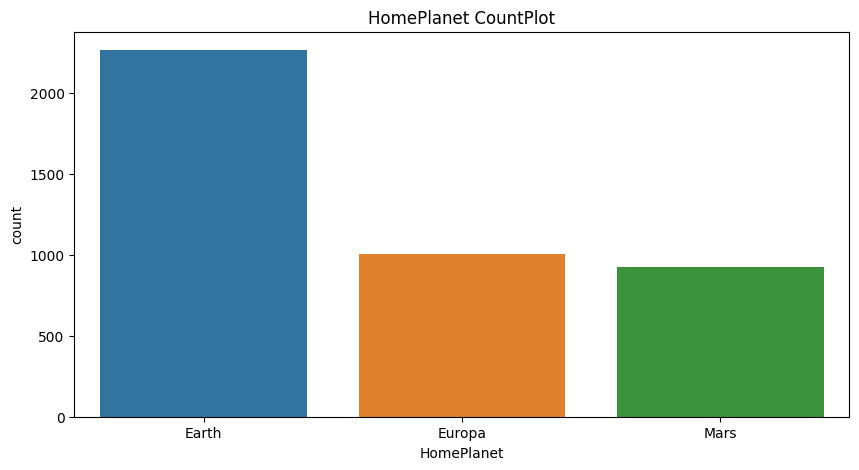

In [79]:
plt.figure(figsize=(10,5))
plt.title("HomePlanet CountPlot")
sns.countplot(x="HomePlanet", data=data)
plt.show()

#CrySleep Column
- binary variable `true` `false`

In [83]:
data[data.CryoSleep.isnull()].tail(n=3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4209,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,False,0.0,1998.0,0.0,1023.0,867.0,Misamak Trupistic
4230,9182_01,Earth,NaN,F/1776/S,TRAPPIST-1e,14.0,False,0.0,0.0,NaN,1377.0,29.0,Garyan Gainebergan
4239,9206_03,Europa,NaN,B/352/S,55 Cancri e,32.0,False,0.0,0.0,0.0,0.0,0.0,Enifik Pokebox


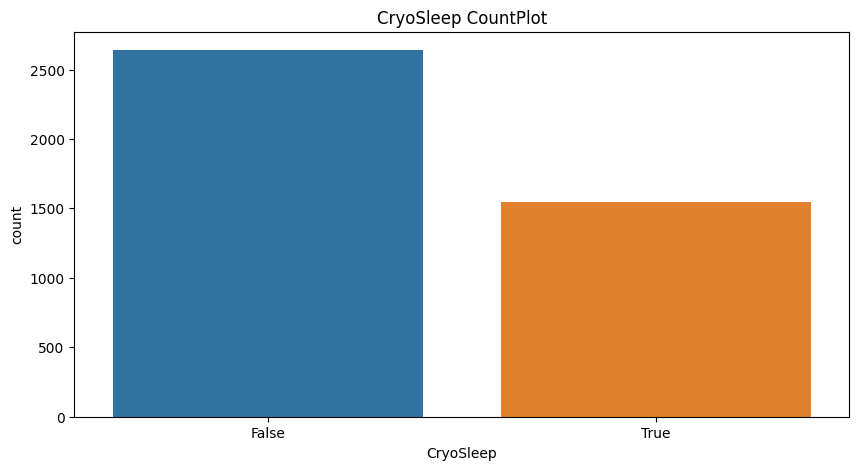

In [84]:
plt.figure(figsize=(10,5))
plt.title("CryoSleep CountPlot")
sns.countplot(x="CryoSleep", data=data)
plt.show()

#Cabin Analysis
- categorical column
- categorical -countplot

In [102]:
data['Cabin'].nunique()

3265

In [92]:
data.Cabin.isnull().sum()

100

In [87]:
data[data.Cabin.isnull()].head(n=3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
18,0047_02,Europa,False,NaN,TRAPPIST-1e,29.0,False,0.0,7708.0,243.0,569.0,343.0,Muons Prucerod
99,0227_01,Earth,NaN,NaN,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Buckentry
135,0293_01,Europa,True,NaN,TRAPPIST-1e,47.0,False,0.0,0.0,0.0,0.0,0.0,Tauxon Suptibler


Renaming the cabin to `Cabin-categories` to test for testing and more visibility

In [91]:
data.rename(columns={"Cabin" : "Cabin-categories"})

,PassengerId,HomePlanet,CryoSleep,Cabin-categories,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


Calculating the % of the missing values over the total

In [98]:
data.Cabin.isnull().sum() / data.shape[0]
#we get 2%, that's not bad.

0.02338087444470423

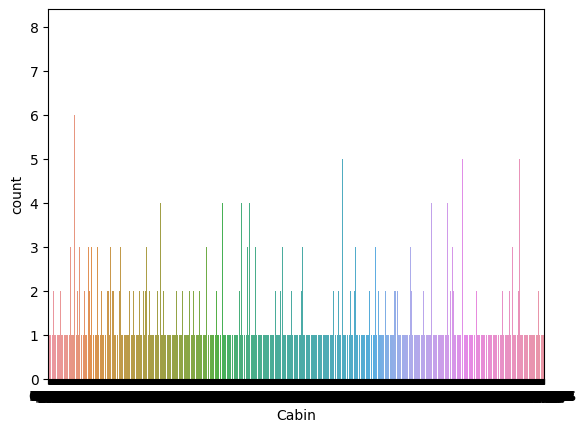

In [101]:
sns.countplot(x="Cabin", data = data)
plt.show()

#Destination

In [103]:
data.Destination.nunique()

3

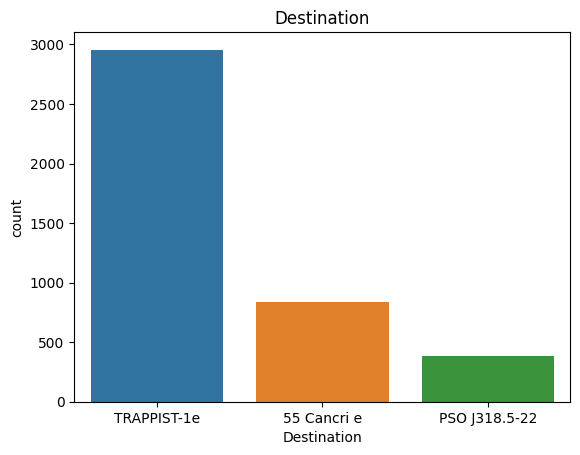

In [105]:
plt.title("Destination")
sns.countplot(x='Destination', data=data)
plt.show()

#Age Analysis
- continuous variable

In [113]:
# data[data.columns["Age"].isnull()].head()

data['Age'].head()

0    27.0
1    19.0
2    31.0
3    38.0
4    20.0
Name: Age, dtype: float64

In [114]:
data.Age.isnull().sum()

91

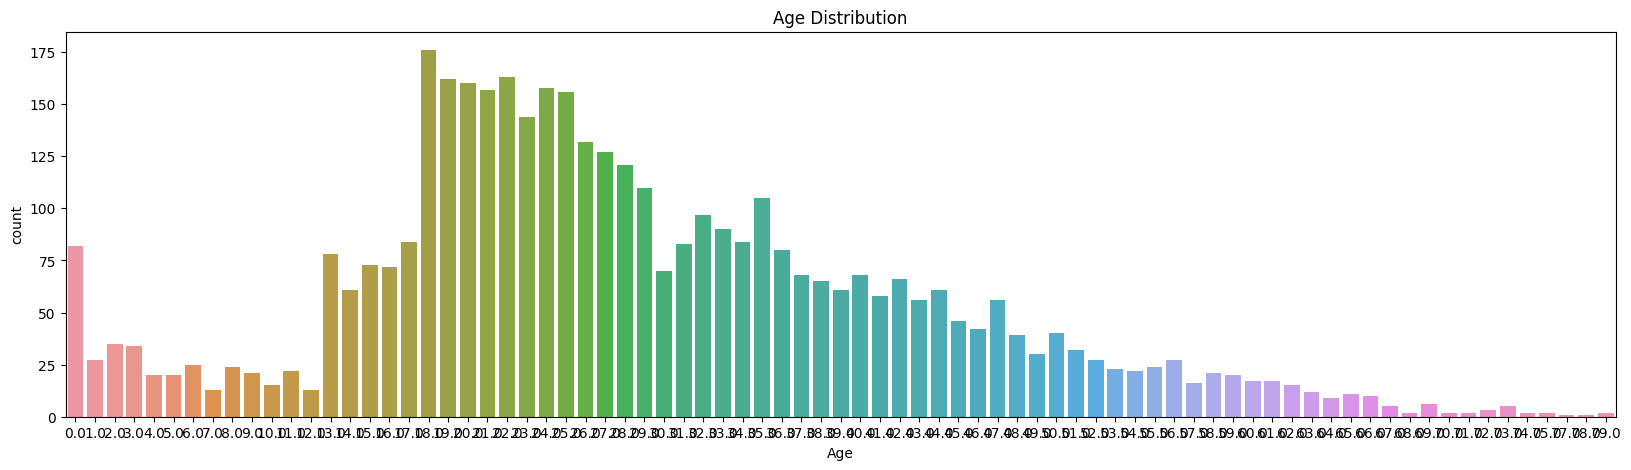

In [120]:
plt.figure(figsize=(20,5))
plt.title("Age Distribution")
sns.countplot(x="Age", data=data)
plt.show()

Calculate the mean Age

In [122]:
Age_mean = data.Age.mean()
Age_mean

28.65814620162446

#THE END



In [ ]:
def preprocessing(data):
  #drop passenger ID
  data.drop('PassengerId', axis=1, inplace=True)
  #Fill missing categorical values
  data.HomePlanet.fillna("Missing")
  #Fill in the missing CryoSleep varibles
  data.CryoSleep.fillna('Missing')
  #Filling missing values in cabin
  data.Cabin.fillna('Missing')
  #Destination, filling missing values
  data.Destination.fillna('Missing')
  #fill age with the mean 
  data.Age.fillna(Age_mean)